In [16]:
import torch
import torch.nn as nn
from torch.func import vmap, grad, functional_call  # Nouvelle API PyTorch 2.x
import torch.optim as optim
import vutils

# Modèle simple
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.linear = nn.Linear(50, 10)
        self.linear2 = nn.Linear(10, 1)

    def forward(self, x):
        output = self.linear(x)
        output = torch.relu(output)
        output = self.linear2(output)
        return output

# Initialisation
model = SimpleModel()
criterion = nn.MSELoss()

# Génération de données
batch_size = 50
x = torch.randn(batch_size, 50)  # Pas besoin de requires_grad=True ici
y = torch.randn(batch_size, 1)

# Dummy model
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Forward and backward pass
output = model(x)
loss = criterion(output, y)
loss.backward()
optimizer.step()

# Accessing first and second moments
for param in model.parameters():
    state = optimizer.state[param]
    if 'exp_avg' in state and 'exp_avg_sq' in state:
        m = state['exp_avg']       # First moment
        v = state['exp_avg_sq']    # Second moment
        print("First moment (m):", m)
        print("Second moment (v):", v - m * m)  # Variance


First moment (m): tensor([[-3.4807e-03,  4.1499e-04, -2.1195e-03, -2.2772e-04, -1.4811e-03,
         -1.7291e-03, -7.9211e-03,  1.6519e-03,  2.5089e-03, -6.4518e-03,
         -4.8276e-03, -6.5207e-03,  1.6450e-03,  9.1652e-03, -4.2047e-03,
          2.3316e-03, -4.1201e-04, -3.0580e-04, -4.3357e-03,  6.7164e-03,
          1.5743e-06, -2.7131e-03,  1.6324e-03, -4.7877e-03,  2.8570e-03,
          9.2001e-03,  1.8426e-03,  1.0648e-02,  3.6987e-03, -8.0440e-04,
          6.0412e-03, -3.8884e-03,  6.5495e-03,  4.2438e-04, -6.3455e-04,
         -4.8663e-04,  3.6587e-03, -9.6231e-03,  3.0350e-03, -3.5595e-03,
         -8.2460e-03,  4.9714e-04, -3.4483e-04,  1.9107e-03, -4.5734e-03,
         -1.0200e-02, -6.1405e-03, -1.6154e-03,  4.7347e-03,  2.0785e-03],
        [-7.5959e-04,  1.9160e-03, -2.5392e-03, -2.5592e-03, -2.2531e-03,
         -1.2152e-03, -7.2810e-04,  3.5876e-03,  2.9654e-03,  6.5077e-04,
         -3.5390e-03,  1.0050e-03,  2.8655e-03,  6.6102e-05, -1.0353e-03,
         -2.0887e-0

In [6]:
grad_mean[0]

tensor([[-1.0703e-01, -9.0144e-02,  1.2760e-02, -1.9618e-02, -5.5225e-02,
         -4.4791e-02,  2.5984e-02, -5.1811e-02,  5.3330e-03,  1.8896e-02,
         -1.2023e-02, -1.9219e-02, -3.7147e-02,  1.4501e-03,  2.4945e-02,
         -2.8242e-02, -1.7741e-02, -4.9473e-02,  2.7707e-02, -3.7246e-02,
         -9.4074e-03,  6.9669e-02,  1.6835e-02, -3.8562e-02,  3.0717e-02,
          6.9414e-02,  2.3347e-02,  3.3495e-02,  3.2160e-02, -5.3598e-02,
          2.1633e-02, -2.4780e-02,  9.7099e-02,  4.3814e-02, -2.7061e-03,
          7.0666e-03, -4.5756e-03, -2.8064e-02,  3.6953e-03,  4.2616e-02,
          2.5412e-02,  1.3926e-02,  5.2687e-02, -1.4603e-02,  3.1319e-02,
         -1.8652e-02, -1.2371e-01,  5.4967e-02, -7.3906e-02,  1.0067e-01],
        [ 2.0966e-02, -1.1621e-02,  2.2251e-02,  4.1807e-02,  1.5766e-02,
         -4.7235e-02,  2.3948e-02,  7.9070e-02, -5.4313e-02, -8.7369e-02,
          3.7255e-02, -5.0182e-03, -1.3130e-02, -2.6685e-02,  1.2688e-02,
          7.8228e-02,  2.2422e-02,  1

In [7]:
import torch

# Example tensor
x = torch.tensor([0.0, 1.0, 2.0])

# Define a standard normal distribution (mean=0, std=1)
normal_dist = torch.distributions.Normal(loc=0.0, scale=1.0)

# Apply the CDF
cdf_values = normal_dist.cdf(x)

print(cdf_values)

tensor([0.5000, 0.8413, 0.9772])


In [17]:
normal_dist = torch.distributions.Normal(loc=0.0, scale=1.0)

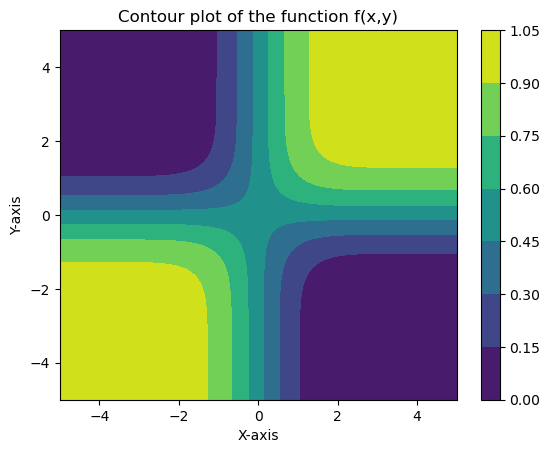

In [23]:

X = torch.linspace(-5, 5, 100)
Y = torch.linspace(-5, 5, 100)

gX = normal_dist.cdf(X)
gY = normal_dist.cdf(Y)

def f(x,y):
    return normal_dist.cdf(x) * normal_dist.cdf(y) + (1 - normal_dist.cdf(x)) * (1 - normal_dist.cdf(y))

import matplotlib.pyplot as plt

[X, Y] = torch.meshgrid(X, Y)
Z = f(X, Y)

plt.contourf(X.numpy(), Y.numpy(), Z.numpy())
plt.colorbar()
plt.title('Contour plot of the function f(x,y)')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

